# Task for Today
***
 Predict the type of forest cover based on ecological data (Human influences are excluded within the features as much as possible)
 Treat the imbalance between output classes and fit it to Logistic Regression Model.

## Set Up

In [2]:
!pip install seaborn --upgrade

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     |████████████████████████████████| 285 kB 916 kB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
/kaggle/input/forest-cover-type-dataset/covtype.csv


In [3]:
data = pd.read_csv('../input/forest-cover-type-dataset/covtype.csv')

In [4]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
# Indexing the Class Labels from 0 rather than 1
data.Cover_Type = data.Cover_Type - 1

In [6]:
data.Cover_Type.value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

## Visualize the Imbalanced Data: Class Distribution

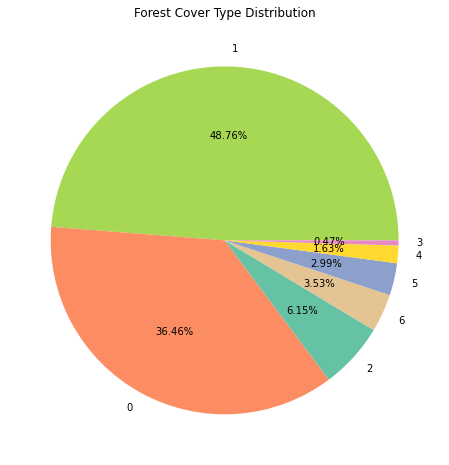

In [7]:
cmap = sns.color_palette('Set2', as_cmap=True)(data.Cover_Type.unique()) # get color map from sns and initialize 7 values from it

plt.figure(figsize=(8,8))
plt.pie(
    data.Cover_Type.value_counts().values,
    colors=cmap,
    labels=data.Cover_Type.value_counts().keys(),
    autopct='%.2f%%',
)
plt.title("Forest Cover Type Distribution")
plt.show() 

## Some Helper Functions

In [10]:
def split_and_scale(df):
    df= df.copy()
    
    # Split df in X and y
    y = df.Cover_Type.copy()
    X = df.drop('Cover_Type', axis=1).copy()
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X 
    sc = StandardScaler()
    sc.fit(X_train)
    
    # Transform fcn returns numpy array -> Turn back into dataframe
    X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [19]:
def evaluate_model(model, class_balance, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc*100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    
    print('Classification Report: \n ------------------------------- \n', clr)

## Training with Imbalanced Data

In [11]:
imbalanced_data = data.copy()

X_train, X_test, y_train, y_test = split_and_scale(imbalanced_data)

In [12]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Accuracy (Imbalaced Data): 72.44%


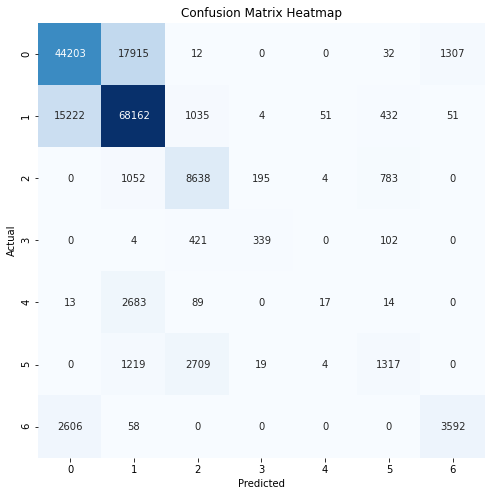

Classification Report: 
 ------------------------------- 
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     63469
           1       0.75      0.80      0.77     84957
           2       0.67      0.81      0.73     10672
           3       0.61      0.39      0.48       866
           4       0.22      0.01      0.01      2816
           5       0.49      0.25      0.33      5268
           6       0.73      0.57      0.64      6256

    accuracy                           0.72    174304
   macro avg       0.60      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



In [20]:
evaluate_model(model1, 'Imbalaced Data', X_test, y_test)

## Training with UnderSampled Data

In [21]:
undersampled_data = data.copy()

In [23]:
undersampled_data.Cover_Type.value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [28]:
min_class_size = min(undersampled_data.Cover_Type.value_counts().values)
print("Size of smallest class: ", min_class_size)

Size of smallest class:  2747


In [35]:
# Undersample all the majority classes
class_subsets = [undersampled_data.query('Cover_Type == ' + str(i)) for i in range(7)]

In [36]:
# All Classes will be downsized using below
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, random_state=123)

In [37]:
# Combine all Subsets (row-wise), Shuffle the data using sample fcn, Reset the index and drop the old index
undersampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [42]:
undersampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,5,13,319,78,3844,202,213,147,3290,...,1,0,0,0,0,0,0,0,0,6
1,3032,138,12,124,17,1637,238,236,127,1080,...,0,0,0,0,0,0,0,0,0,0
2,2165,204,32,295,146,603,186,249,177,295,...,0,0,0,0,0,0,0,0,0,2
3,2834,80,16,513,169,532,240,210,95,2322,...,0,0,0,0,0,0,0,0,0,4
4,2972,293,4,30,5,1539,209,239,168,1630,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,2801,110,9,42,4,713,236,230,126,108,...,0,0,0,0,0,0,0,0,0,4
19225,2508,116,28,351,100,330,254,200,53,1209,...,0,0,0,0,0,0,0,0,0,2
19226,1998,325,32,335,143,306,125,187,193,969,...,0,0,0,0,0,0,0,0,0,5
19227,3370,315,3,0,0,4337,212,237,163,4160,...,0,0,0,0,0,0,0,0,1,6


In [43]:
undersampled_data.Cover_Type.value_counts()

6    2747
5    2747
4    2747
3    2747
2    2747
1    2747
0    2747
Name: Cover_Type, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_data)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Accuracy (Undersampled): 70.84%


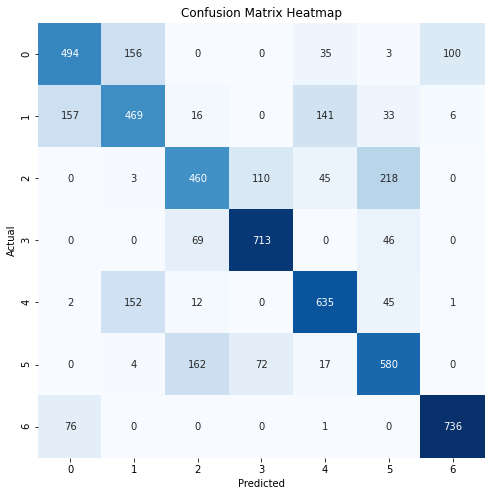

Classification Report: 
 ------------------------------- 
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.60      0.57      0.58       822
           2       0.64      0.55      0.59       836
           3       0.80      0.86      0.83       828
           4       0.73      0.75      0.74       847
           5       0.63      0.69      0.66       835
           6       0.87      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.71      0.71      0.71      5769
weighted avg       0.71      0.71      0.71      5769



In [45]:
evaluate_model(model2, 'Undersampled', X_test, y_test)

 ## Training with OverSampled Data

In [46]:
oversampled_data = data.copy()

max_class_size = max(oversampled_data.Cover_Type.value_counts().values)
max_class_size

283301

In [56]:
# Make all subsets of Classes match the oversampled size
class_subsets_ov = [oversampled_data.query('Cover_Type == ' + str(i)) for i in range(7)]

for i in range(7):
    class_subsets_ov[i] = class_subsets_ov[i].sample(max_class_size, replace=True, random_state=123)

In [58]:
oversampled_data = pd.concat(class_subsets_ov, axis = 0).sample(frac=1).reset_index(drop=True)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type
2333       70      7      0                                  0                              417                              228            226             132            1396                        

In [59]:
oversampled_data.Cover_Type.value_counts()

6    283301
5    283301
4    283301
3    283301
2    283301
1    283301
0    283301
Name: Cover_Type, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_data)
model3 = LogisticRegression()
